In [383]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [384]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,tpsa,saacc,h-050,mlogp,rdchi,gats1p,nn,c-040,lc50
0,0.514570,0.411306,0.000000,0.019635,-1.875809,-0.955340,0.001262,0.00000,-0.455071
1,0.514570,0.411306,0.000000,0.159062,-1.554684,-1.066755,0.001262,0.00000,-0.093061
2,0.123412,0.107901,0.000000,1.745911,0.652219,-1.568754,0.001262,0.00000,1.307301
3,0.123412,0.107901,0.000000,1.598251,0.599535,-1.535789,0.001262,0.00000,1.168207
4,0.123412,0.107901,0.000000,0.954059,0.439081,-0.868297,0.001262,0.00000,0.804428
5,1.000000,1.000000,0.375897,-2.248683,2.363947,0.778006,0.001262,0.85619,0.847093
6,0.123412,0.107901,0.000000,0.211611,-0.134453,0.392174,0.001262,0.00000,1.453502
7,0.514570,0.411306,0.000000,0.530092,-0.138569,-0.110742,0.001262,0.00000,-0.231058
8,0.514570,0.411306,0.000000,-0.218431,-0.894383,0.590631,0.001262,0.00000,-0.328732
9,0.514570,0.411306,0.000000,0.225688,-1.105498,0.925043,0.001262,0.00000,-0.411327


In [385]:
X = dataset.drop(columns=['mlogp', 'c-040']).values
Y = dataset['lc50'].values

In [386]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [387]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 7


first_hidden_layer_size = 4
second_hidden_layer_size = 4

output_layer_size = 1


epochs_number = 30
batch_size = 8

In [388]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(output_layer_size, activation='linear'))

In [389]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 4)                 32        
_________________________________________________________________
dense_104 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [390]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [391]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 436 samples, validate on 110 samples
Epoch 1/30
436/436 [==============================] - 0s 765us/step - loss: 0.8730 - mean_absolute_error: 0.7060 - mean_squared_error: 0.8730 - val_loss: 0.9286 - val_mean_absolute_error: 0.6916 - val_mean_squared_error: 0.9286
Epoch 2/30
436/436 [==============================] - 0s 405us/step - loss: 0.7475 - mean_absolute_error: 0.6448 - mean_squared_error: 0.7475 - val_loss: 0.7982 - val_mean_absolute_error: 0.6322 - val_mean_squared_error: 0.7982
Epoch 3/30
436/436 [==============================] - 0s 346us/step - loss: 0.6190 - mean_absolute_error: 0.5768 - mean_squared_error: 0.6190 - val_loss: 0.6536 - val_mean_absolute_error: 0.5696 - val_mean_squared_error: 0.6536
Epoch 4/30
436/436 [==============================] - 0s 363us/step - loss: 0.4959 - mean_absolute_error: 0.5133 - mean_squared_error: 0.4959 - val_loss: 0.5283 - val_mean_absolute_error: 0.5128 - val_mean_squared_error: 0.5283
Epoch 5/30
436/436 [======================

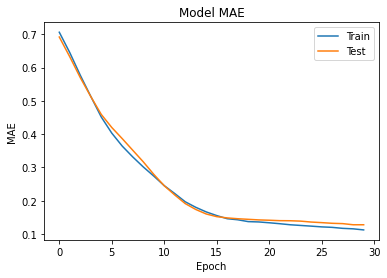

In [392]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

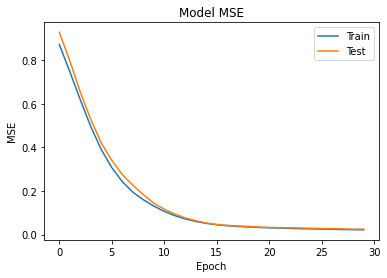

In [393]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [394]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

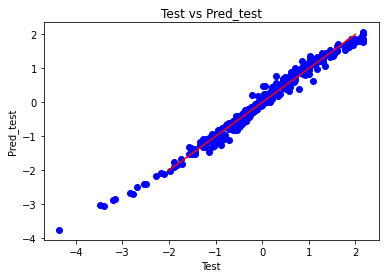

In [395]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

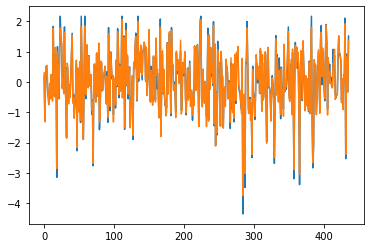

In [396]:
# Выведем значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [397]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

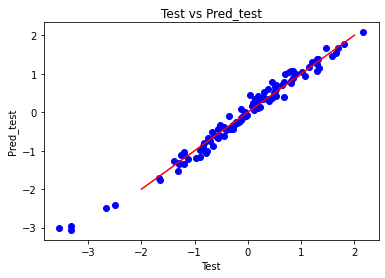

In [398]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

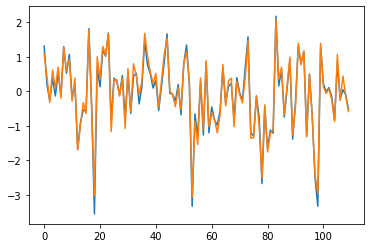

In [399]:
# Выведем значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [400]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.1446287357917226
0.15919772658125786


In [401]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9837688207626343, p = 8.46638940856792e-05
Test k = 0.983942449092865, p = 0.20988544821739197


In [402]:
# Для полной выборки (Y, Y_pred) применим статистические тесты shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.988175094127655, p_s = 0.0002127817424479872
k_n = 16.913644784532877, p_n = 0.00021244606952801735


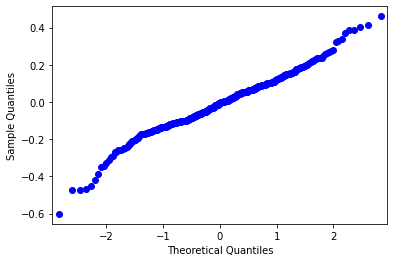

In [403]:
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

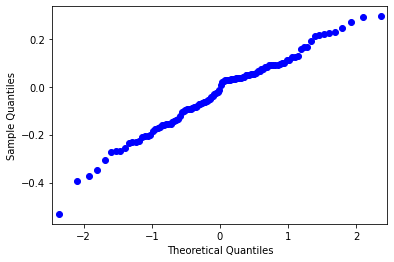

In [404]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

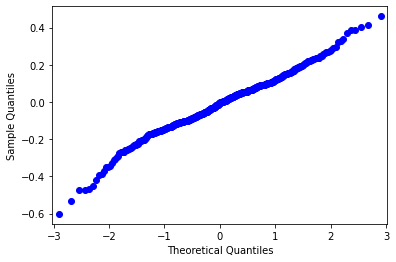

In [405]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

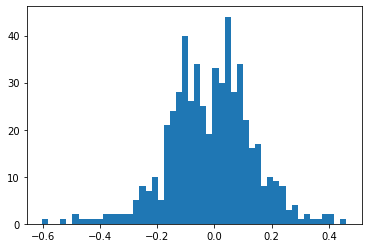

In [406]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [407]:
model.save('SimpleNeuralNetwork.h5')